# Assignment 1

- Name: **Arnab Sen**
- Roll: **510519006**
- Date: **Aug 12, 2022**

## (i) Download data

Data downloaded and stored at [drive](https://drive.google.com/drive/folders/1-2d4kuiufZHmaXDhBi2sAYeoYPgBnQqL).

In [542]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [543]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [544]:
BASE_PATH = '/content/drive/MyDrive/Colab_Notebooks/ML_DRIVE/Assign_1/dataset'

In [545]:
import numpy as np
import pandas as pd # read csv files
from sklearn.model_selection import train_test_split # test and train data split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns # graph plot
import matplotlib.pyplot as plt # scatter plot
from sklearn.preprocessing import PolynomialFeatures # polynomial regression

## (ii) Reading and formating dataset 
Read the dataset in the Pandas data frame. Remove the rows with a missing value. Divide the training.csv into two sets of ratio 80:20 entitled to train and test set respectively.

In [546]:
dataset = pd.read_csv(f"{BASE_PATH}/train.csv")
scaler = StandardScaler()

In [547]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## (iii) Linear Regression

Use the linear regression method to estimate the slope and intercept for predicting `SalePrice` based on `LotArea`

Remove the missing rows corresponding to only `SalePrice` and `LotArea` columns.

In [548]:
df = dataset.loc[:, ['SalePrice', 'LotArea']].dropna()

Splitting the dataset in 80:20 ratio for fitting the model and then testing.

In [549]:
train_df, test_df = train_test_split(df, test_size=0.2)

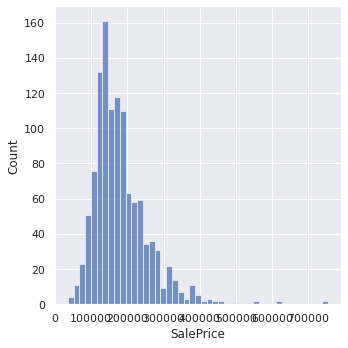

In [550]:
sns.displot(train_df['SalePrice']);

In [551]:
train_df.head()

,SalePrice,LotArea
926,285000,11999
649,84500,1936
64,219500,9375
189,286000,4923
1421,127500,4043


In [552]:
test_df.head()

,SalePrice,LotArea
468,250000,11428
470,212000,6820
968,37900,5925
376,148000,8846
865,148500,8750


Scatter plot to see the relationship between `SalePrice` and `LotArea`.

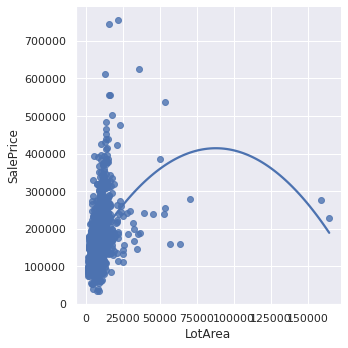

In [553]:
# ci: used to specify the size of the interval
sns.lmplot(x ="LotArea", y ="SalePrice", data = train_df, ci=None, order=2)

In [554]:
X_train = np.array(train_df['LotArea']).reshape(-1, 1) # have one column and as many rows as necessary
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df['SalePrice']).reshape(-1, 1)

X_test = np.array(test_df['LotArea']).reshape(-1, 1)
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df['SalePrice']).reshape(-1, 1)

In [555]:
model = LinearRegression()
 
new_model = model.fit(X_train, y_train)
y_pred = new_model.predict(X_test)

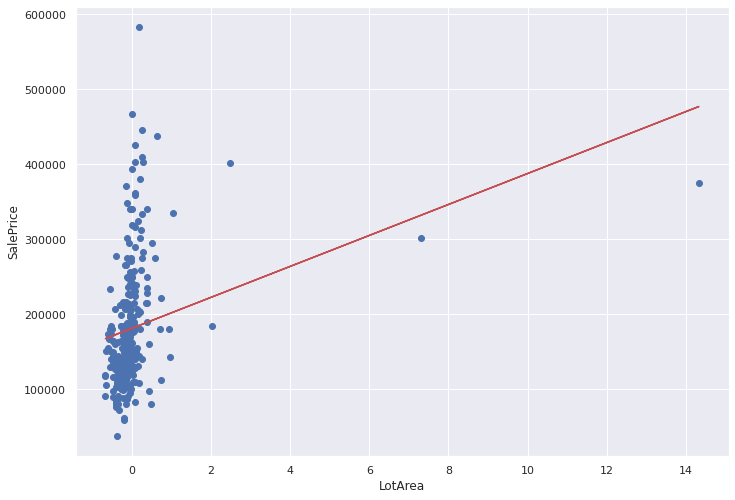

In [556]:
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color ='r')
 
plt.show()

- **Coefficient of Determination:** With linear regression, the coefficient of determination is equal to the square of the correlation between the x and y variables.

In [557]:
print("Linear Regression\n====================")
print("coefficient of determination (r-squared):", new_model.score(X_test, y_test)) 
print("intercept:", new_model.intercept_)
print("slope:", new_model.coef_)
mse_linear_regression = mean_squared_error(y_test, y_pred)
print("mean squared error:", mse_linear_regression)

Linear Regression
coefficient of determination (r-squared): 0.08266730291019242
intercept: [181174.69606164]
slope: [[20665.83775877]]
mean squared error: 6092303156.234104


## (iv) Multiple Regression
### Model 1: LotFrontage, LotArea

In [558]:
lot_area_weights = [] # required for question (vii)

In [559]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'LotFrontage']].dropna()

In [560]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [561]:
train_df.head()

,SalePrice,LotArea,LotFrontage
1001,86000,5400,60.0
268,120500,6900,71.0
204,110000,3500,50.0
1212,113000,9340,50.0
365,147000,10690,59.0


In [562]:
test_df.head()

,SalePrice,LotArea,LotFrontage
1350,200000,11643,91.0
1175,285000,10678,85.0
1311,203000,8814,68.0
1410,230000,12420,79.0
1071,154000,11700,78.0


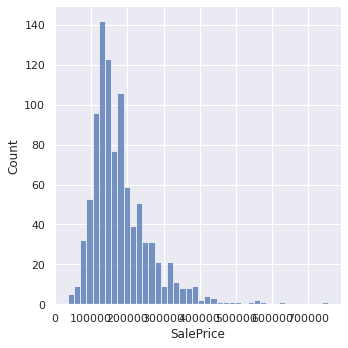

In [563]:
sns.displot(train_df['SalePrice']);

In [564]:
variables = ['LotArea', 'LotFrontage']
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [565]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [566]:
y_pred = new_model.predict(X_train)
r2_m1_train = new_model.score(X_train, y_train)
mse_m1_train = mean_squared_error(y_train, y_pred)
print("[Model 1 training] mean squared error:", mse_m1_train)
print("[Model 1 training] r2 score:", r2_m1_train)

y_pred = new_model.predict(X_test)
r2_m1_test = new_model.score(X_test, y_test)
mse_m1_test = mean_squared_error(y_test, y_pred)
print("[Model 1 testing] mean squared error:", mse_m1_test)
print("[Model 1 testing] r2 score:", r2_m1_test)

[Model 1 training] mean squared error: 5624107998.43659
[Model 1 training] r2 score: 0.15674940645403534
[Model 1 testing] mean squared error: 6655777705.427111
[Model 1 testing] r2 score: 0.17303681161540152


In [567]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
    
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   14461.793682408417
LotFrontage               23384.152426978068


### Model 2: LotFrontage, LotArea, OverallQual, OverallCond

In [568]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']].dropna()

In [569]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [570]:
train_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond
190,315000,10570,70.0,8,8
999,206000,6762,64.0,7,5
1241,248328,9849,83.0,7,6
573,170000,9967,76.0,7,5
15,132000,6120,51.0,7,8


In [571]:
test_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond
909,174000,12589,149.0,6,5
1133,239500,9828,80.0,8,5
603,151000,3182,30.0,7,5
60,158000,13072,63.0,6,5
1065,328000,14000,80.0,7,5


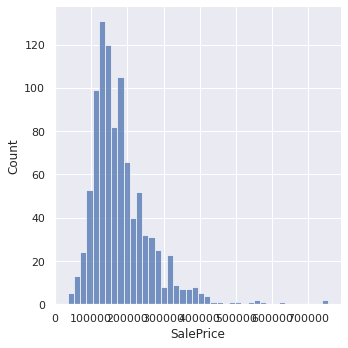

In [572]:
sns.displot(train_df['SalePrice']);

In [573]:
variables = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [574]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [575]:
y_pred = new_model.predict(X_train)
r2_m2_train = new_model.score(X_train, y_train)
mse_m2_train = mean_squared_error(y_train, y_pred)
print("[Model 2 training] mean squared error:", mse_m2_train)
print("[Model 2 training] r2 score:", r2_m2_train)

y_pred = new_model.predict(X_test)
r2_m2_test = new_model.score(X_test, y_test)
mse_m2_test = mean_squared_error(y_test, y_pred)
print("[Model 2 testing] mean squared error:", mse_m2_test)
print("[Model 2 testing] r2 score:", r2_m2_test)

[Model 2 training] mean squared error: 2173743721.3687043
[Model 2 training] r2 score: 0.6807952868198797
[Model 2 testing] mean squared error: 2367248284.9225645
[Model 2 testing] r2 score: 0.6842821691131709


In [576]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   11136.8044962903
LotFrontage               9244.841249409728
OverallQual               61583.28732019769
OverallCond               -102.41031001503097


### Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea

In [577]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']].dropna()

In [578]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [579]:
train_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond,1stFlrSF,GrLivArea
587,137000,8740,74.0,5,6,860,860
1273,177000,11512,124.0,6,7,1357,1357
1379,167500,9735,73.0,5,5,754,1394
1151,149900,17755,134.0,5,4,1466,1466
1005,149900,8385,65.0,5,8,985,985


In [580]:
test_df.head()

,SalePrice,LotArea,LotFrontage,OverallQual,OverallCond,1stFlrSF,GrLivArea
1329,176500,9084,63.0,7,5,955,1632
1332,100000,8877,67.0,4,6,816,816
876,132250,25286,94.0,4,5,1040,1040
1310,335000,17500,100.0,7,8,1902,1902
1255,127500,6240,52.0,6,6,959,1367


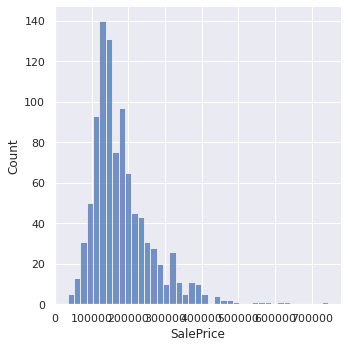

In [581]:
sns.displot(train_df['SalePrice']);

In [582]:
variables = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [583]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [584]:
y_pred = new_model.predict(X_train)
r2_m3_train = new_model.score(X_train, y_train)
mse_m3_train = mean_squared_error(y_train, y_pred)
print("[Model 3 training] mean squared error:", mse_m3_train)
print("[Model 3 training] r2 score:", r2_m3_train)

y_pred = new_model.predict(X_test)
r2_m3_test = new_model.score(X_test, y_test)
mse_m3_test = mean_squared_error(y_test, y_pred)
print("[Model 3 testing] mean squared error:", mse_m3_train)
print("[Model 3 testing] r2 score:", r2_m3_test)

[Model 3 training] mean squared error: 1705945890.8357406
[Model 3 training] r2 score: 0.7576982028082635
[Model 3 testing] mean squared error: 1705945890.8357406
[Model 3 testing] r2 score: 0.6695918826383475


In [585]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   6374.9246109743735
LotFrontage               1524.460617406945
OverallQual               47710.77823490351
OverallCond               1440.6205348023514
1stFlrSF                  13120.807238707632
GrLivArea                 20414.671183909024


## (v) Compare the Mean squared Error, R2 score

#### Comparing R2 score

#### Comparing Mean Squared Error

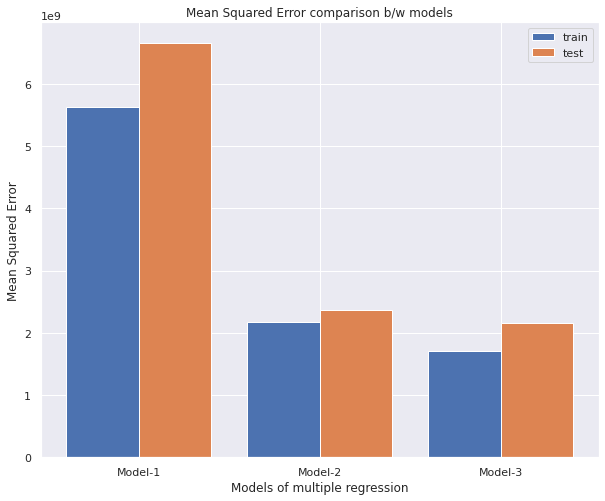

In [586]:
plt.figure(figsize=(10, 8))
plt.xlabel("Models of multiple regression")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error comparison b/w models")
x = ["Model-1", "Model-2", "Model-3"]
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, [mse_m1_train, mse_m2_train, mse_m3_train], width=0.4, label="train")
plt.bar(x_axis+0.2, [mse_m1_test, mse_m2_test, mse_m3_test], width=0.4, label="test")
plt.xticks(x_axis, x)
plt.legend()
plt.show()

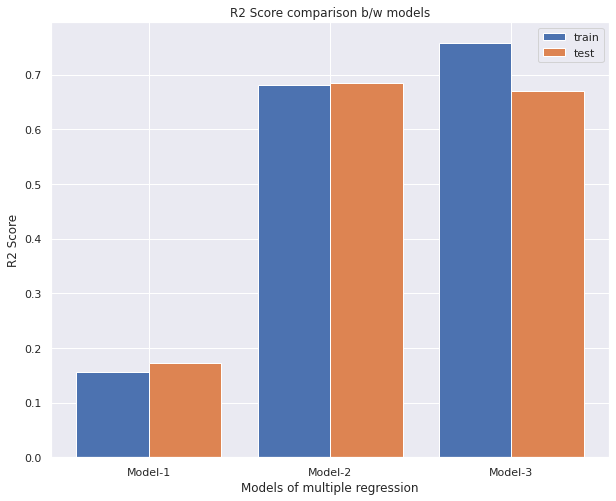

In [587]:
plt.figure(figsize=(10, 8))
plt.xlabel("Models of multiple regression")
plt.ylabel("R2 Score")
plt.title("R2 Score comparison b/w models")
plt.bar(x_axis-0.2, [r2_m1_train, r2_m2_train, r2_m3_train], width=0.4, label="train")
plt.bar(x_axis+0.2, [r2_m1_test, r2_m2_test, r2_m3_test], width=0.4, label="test")
plt.xticks(x_axis, x)
plt.legend()
plt.show()

## (vi) Multiple Regression (contd.)
### Model 4: LotArea, Street

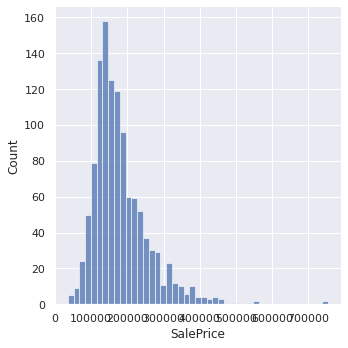

In [588]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'Street']].dropna()
df = pd.get_dummies(df, columns = ['Street'])
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [589]:
test_df.head()

,SalePrice,LotArea,Street_Grvl,Street_Pave
913,145000,6270,0,1
1204,153500,10140,0,1
1123,118000,9405,0,1
507,208300,7862,0,1
572,224500,13159,0,1


In [590]:
train_df.head()

,SalePrice,LotArea,Street_Grvl,Street_Pave
640,274000,12677,0,1
275,205000,7264,0,1
703,140000,7630,0,1
1425,142000,10721,0,1
691,755000,21535,0,1


In [591]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])
X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [592]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [593]:
y_pred = new_model.predict(X_test)
r2_score_m4 = new_model.score(X_test, y_test)
mse_m4 = mean_squared_error(y_test, y_pred)

In [594]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   23454.428840111013
Street_Grvl               -3821.8027884244875
Street_Pave               3821.802788424487


### Model 5: LotArea, OverallCond, Street, Neighborhood

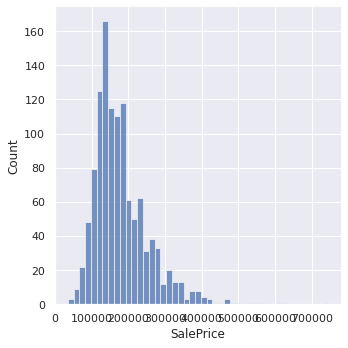

In [595]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'OverallCond', 'Street', 'Neighborhood']].dropna()
df = pd.get_dummies(df, columns = ['Street', 'Neighborhood'])
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [596]:
train_df.head()

,SalePrice,LotArea,OverallCond,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
846,213000,9317,5,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1447,240000,10000,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1357,149900,12537,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1407,112000,8780,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,155835,11103,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [597]:
test_df.head()

,SalePrice,LotArea,OverallCond,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
107,115000,6000,5,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1008,240000,12118,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,309000,13418,5,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
896,106500,8765,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,402000,46589,7,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [598]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [599]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [600]:
y_pred = new_model.predict(X_test)
r2_score_m5 = r2_score(y_test, y_pred)
mse_m5 = mean_squared_error(y_test, y_pred)

In [601]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   17232.359311666838
OverallCond               5690.487380540634
Street_Grvl               6.327053544583567e+17
Street_Pave               6.327053544583633e+17
Neighborhood_Blmngtn      -2.590533868132571e+16
Neighborhood_Blueste      -1.0209180430317758e+16
Neighborhood_BrDale       -2.6871600147070444e+16
Neighborhood_BrkSide      -4.901807323061966e+16
Neighborhood_ClearCr      -3.1236575892665076e+16
Neighborhood_CollgCr      -7.765992363967229e+16
Neighborhood_Crawfor      -4.324727727979392e+16
Neighborhood_Edwards      -6.237147971180368e+16
Neighborhood_Gilbert      -5.977162952043296e+16
Neighborhood_IDOTRR       -3.710661263538179e+16
Neighborhood_MeadowV      -2.036575872723541e+16
Neighborhood_Mitchel      -4.267770627300958e+16
Neighborhood_NAmes        -8.955725171956658e+16
Neighborhood_NPkVill      -1.9058632514995564e+16
Neighborhood_NWAmes       -5.275614016006055e+16
Neighborhood_NoRidge      -4.1511898143531064e+16
Nei

### Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year

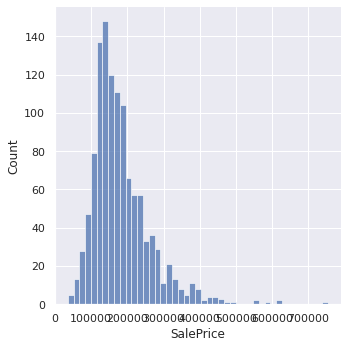

In [602]:
df = dataset.loc[:, ['SalePrice', 'LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt']].dropna()
df = pd.get_dummies(df, columns = ['Street', 'Neighborhood'])
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [603]:
train_df.head()

,SalePrice,LotArea,OverallCond,1stFlrSF,YearBuilt,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
826,109500,6130,6,784,1924,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,245000,10206,5,1563,2007,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
943,143000,25000,4,1632,1967,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,102000,8877,5,1220,1951,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,176000,13811,6,1137,1987,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [604]:
test_df.head()

,SalePrice,LotArea,OverallCond,1stFlrSF,YearBuilt,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
659,167000,9937,7,1486,1964,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119,133700,7560,5,1040,1959,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,207500,16321,6,1600,1957,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858,152000,10400,5,1370,1976,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,150000,11988,6,1244,1957,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [605]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [606]:
model = LinearRegression()
new_model = model.fit(X_train, y_train)

In [607]:
y_pred = new_model.predict(X_test)
r2_score_m6 = r2_score(y_test, y_pred)
mse_m6 = mean_squared_error(y_test, y_pred)

In [608]:
print("Weights/Coefficients:\n")
for name, weight in zip(variables, new_model.coef_.reshape(-1)):
  if name == 'LotArea':
    lot_area_weights.append(weight)
  print(f"{name.ljust(25)} {weight}")

Weights/Coefficients:

LotArea                   9095.208739522406
OverallCond               12479.243545260257
1stFlrSF                  29698.585808062122
YearBuilt                 19379.890463052205
Street_Grvl               3227648041608409.5
Street_Pave               3227648041610349.5
Neighborhood_Blmngtn      7702836130916101.0
Neighborhood_Blueste      2828490006877084.5
Neighborhood_BrDale       6898583347436407.0
Neighborhood_BrkSide      1.3848294144969926e+16
Neighborhood_ClearCr      1.0092763613710126e+16
Neighborhood_CollgCr      2.084761612721487e+16
Neighborhood_Crawfor      1.3166990150151112e+16
Neighborhood_Edwards      1.717979040856982e+16
Neighborhood_Gilbert      1.5569149874755398e+16
Neighborhood_IDOTRR       1.064513654875348e+16
Neighborhood_MeadowV      6898583347434978.0
Neighborhood_Mitchel      1.2737500560328244e+16
Neighborhood_NAmes        2.3887916947579524e+16
Neighborhood_NPkVill      5280262405130682.0
Neighborhood_NWAmes       1.4861610052084344e

## (vi) Compare the feature “LotArea” weights/coefficients for all the six trained models and plot a graph using the Matplotlib library.

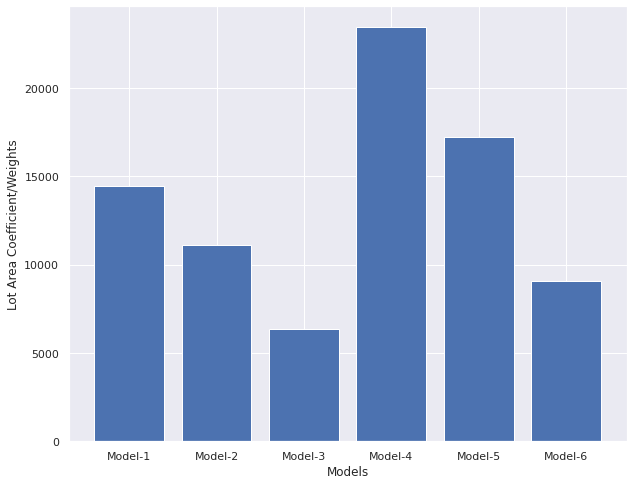

In [609]:
x_values = [f"Model-{x}" for x in range(1, 7)]
y_values = lot_area_weights
plt.figure(figsize=(10,8))
plt.bar(x_values, y_values)
plt.ylabel('Lot Area Coefficient/Weights')
plt.xlabel('Models')
plt.show()

## (vii) Polynomial regression

DegrDegree 2ee 2

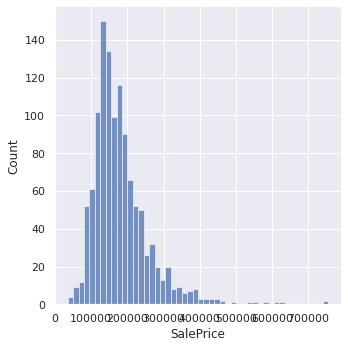

In [610]:
df = dataset.loc[:, ['SalePrice', 'LotArea']].dropna()
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [611]:
train_df.head()

,SalePrice,LotArea
735,163000,10800
311,132000,8000
1021,194000,7406
881,187500,13758
1148,116900,5700


In [612]:
test_df.head()

,SalePrice,LotArea
1358,177500,2117
652,191000,8750
900,110000,7340
681,159434,4500
541,248000,11000


In [613]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [614]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
model = LinearRegression()
new_model = model.fit(X_poly, y_train)

In [615]:
y_pred = new_model.predict(poly.fit_transform(X_train))
r2_score_poly = r2_score(y_train, y_pred)
mse_poly = mean_squared_error(y_train, y_pred)
print("[Poly training] r2 score:", r2_score_poly)
print("[Poly training] mean squared error:", mse_poly)

[Poly training] r2 score: 0.13866776027461258
[Poly training] mean squared error: 5264230361.419709


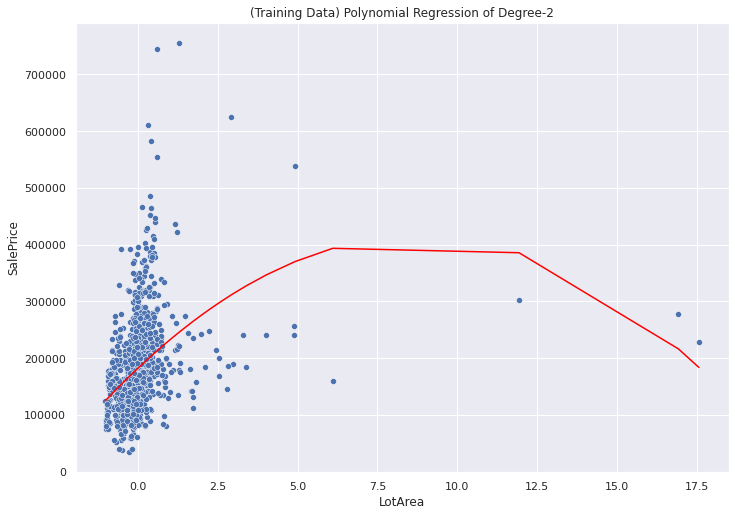

In [616]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(X_train.reshape(-1), y_train.reshape(-1))
ax.set_xlabel("LotArea")
ax.set_ylabel("SalePrice")
ax.set_title("(Training Data) Polynomial Regression of Degree-2")
sns.lineplot(X_train.reshape(-1), y_pred.reshape(-1), color = 'red')

In [617]:
print("(Training Data) Weights/Coefficients:\n", new_model.coef_.reshape(-1))

(Training Data) Weights/Coefficients:
 [    0.         52938.45068525 -3009.53945681]


In [618]:
y_pred = new_model.predict(poly.fit_transform(X_test))
r2_score_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)
print("[Poly testing] r2 score:", r2_score_poly)
print("[Poly testing] mean squared error:", mse_poly)

[Poly testing] r2 score: 0.1558252665513966
[Poly testing] mean squared error: 5954645391.883501


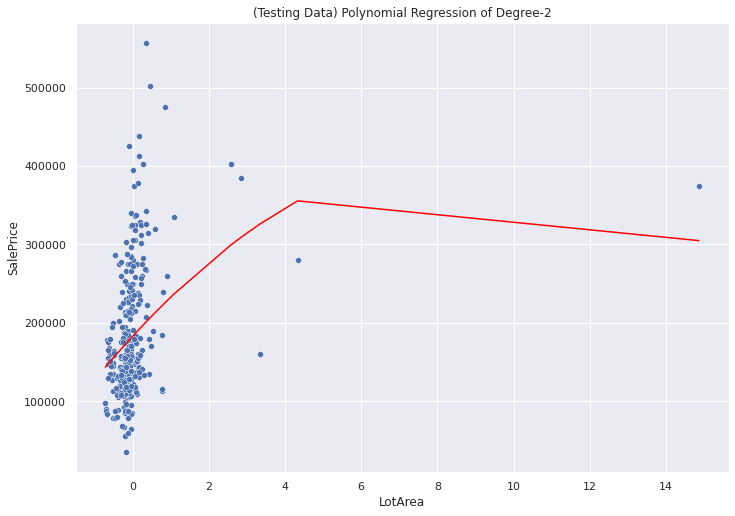

In [619]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(X_test.reshape(-1), y_test.reshape(-1))
ax.set_xlabel("LotArea")
ax.set_ylabel("SalePrice")
ax.set_title("(Testing Data) Polynomial Regression of Degree-2")
sns.lineplot(X_test.reshape(-1), y_pred.reshape(-1), color = 'red')

In [620]:
print("(Testing Data) Weights/Coefficients:\n", new_model.coef_.reshape(-1))

(Testing Data) Weights/Coefficients:
 [    0.         52938.45068525 -3009.53945681]


### Degree 3

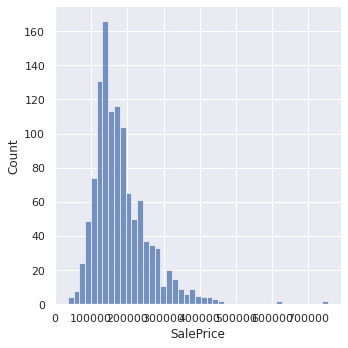

In [621]:
df = dataset.loc[:, ['SalePrice', 'LotArea']].dropna()
train_df, test_df = train_test_split(df, test_size=0.2)
sns.displot(train_df['SalePrice']);

In [622]:
train_df.head()

,SalePrice,LotArea
293,235000,16659
251,235000,4750
539,272000,11423
326,324000,10846
298,175000,11700


In [623]:
test_df.head()

,SalePrice,LotArea
1203,213000,9750
1293,162900,10140
605,205000,13600
618,314813,11694
427,109008,8593


In [624]:
variables = train_df.columns.array[1:]
X_train = np.array(train_df[variables])
X_train = scaler.fit_transform(X_train)
y_train = np.array(train_df[['SalePrice']])

X_test = np.array(test_df[variables])
X_test = scaler.fit_transform(X_test)
y_test = np.array(test_df[['SalePrice']])

In [625]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
model = LinearRegression()
new_model = model.fit(X_poly, y_train)

In [626]:
y_pred = new_model.predict(poly.fit_transform(X_train))
r2_score_poly = r2_score(y_train, y_pred)
mse_poly = mean_squared_error(y_train, y_pred)
print("[Poly training] r2 score:", r2_score_poly)
print("[Poly training] mean squared error:", mse_poly)

[Poly training] r2 score: 0.1687319597132202
[Poly training] mean squared error: 5392311367.540129


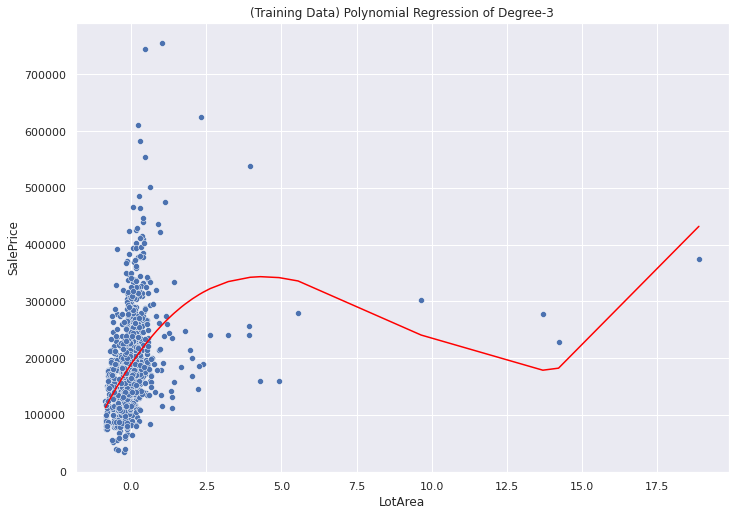

In [627]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(X_train.reshape(-1), y_train.reshape(-1))
ax.set_xlabel("LotArea")
ax.set_ylabel("SalePrice")
ax.set_title("(Training Data) Polynomial Regression of Degree-3")
sns.lineplot(X_train.reshape(-1), y_pred.reshape(-1), color = 'red')

In [628]:
print("(Training Data) Weights/Coefficients:\n", new_model.coef_.reshape(-1))

(Training Data) Weights/Coefficients:
 [     0.          78881.83508265 -11940.74092112    447.09782091]


In [629]:
y_pred = new_model.predict(poly.fit_transform(X_test))
r2_score_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)
print("[Poly testing] r2 score:", r2_score_poly)
print("[Poly testing] mean squared error:", mse_poly)

[Poly testing] r2 score: 0.01985733188443628
[Poly testing] mean squared error: 5393646937.95993


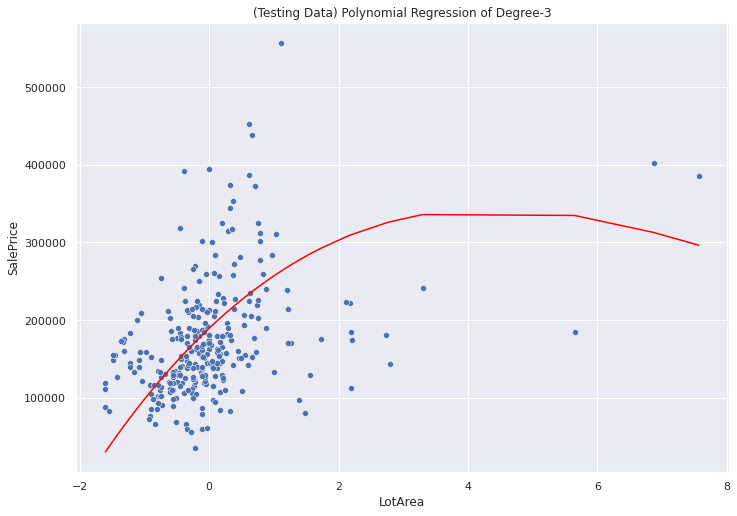

In [630]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(X_test.reshape(-1), y_test.reshape(-1))
ax.set_xlabel("LotArea")
ax.set_ylabel("SalePrice")
ax.set_title("(Testing Data) Polynomial Regression of Degree-3")
sns.lineplot(X_test.reshape(-1), y_pred.reshape(-1), color = 'red')

In [631]:
print("(Testing Data) Weights/Coefficients:\n", new_model.coef_.reshape(-1))

(Testing Data) Weights/Coefficients:
 [     0.          78881.83508265 -11940.74092112    447.09782091]
